## First, we import all the necessary libraries ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import sys
import numpy as np
import folium
import matplotlib.ticker as mtick
import plotly.express as px

## Then open the selected file ##

In [2]:
#read csv file
df = pd.read_csv("rounded_population.csv")
df

Year                    Region                Country  Christians  \
0     2010                     World          All Countries  2168330000   
1     2010             North America          All Countries   266630000   
2     2010   Latin America-Caribbean          All Countries   531280000   
3     2010                    Europe          All Countries   553280000   
4     2010  Middle East-North Africa          All Countries    12710000   
...    ...                       ...                    ...         ...   
1200  2050        Sub-Saharan Africa               Zimbabwe    16230000   
1201  2050        Sub-Saharan Africa            South Sudan    12750000   
1202  2050   Latin America-Caribbean                Curacao      170000   
1203  2050   Latin America-Caribbean           Sint Maarten       60000   
1204  2050   Latin America-Caribbean  Caribbean Netherlands       20000   

         Muslims  Unaffiliated      Hindus  Buddhists  Folk Religions  \
0     1599700000    1131150000  1032210000  487760000       404690000   
1        3480000      59040000     2250000    3860000         1020000   
2         840000      45390000      660000     410000        10040000   
3       43470000     139890000     1380000    1350000          870000   
4      317070000       2100000     1720000     500000         1060000   
...          ...           ...         ...        ...             ...   
1200      200000       1430000       10000      10000          930000   
1201     1300000        100000       10000      10000         6930000   
1202       10000         10000       10000      10000           10000   
1203       10000         10000       10000      10000           10000   
1204       10000         10000       10000      10000           10000   

      Other Religions      Jews  All Religions  
0            58150000  13860000     6895850000  
1             2200000   6040000      344530000  
2              990000    470000      590080000  
3              890000   1420000      742550000  
4              230000   5630000      341020000  
...               ...       ...            ...  
1200            50000     10000       18850000  
1201            10000     10000       21080000  
1202            10000     10000         180000  
1203            10000     10000          60000  
1204            10000     10000          20000  

[1205 rows x 12 columns]

## Search all unique years in our data  ##

In [3]:
all_years = df.Year.unique()      #method unique() to put all unique years
print(f"There are all years included in this dataset: ")
for year in all_years:
    print(f"{year}")

There are all years included in this dataset: 
2010
2020
2030
2040
2050


## To start, we filtered the data and selected rows where Region equals World ##

In [4]:
#create new DataFrame - region is equal to World
df_world = df.loc[df["Region"].str.contains("World")] #The contains() method helps us to define rows that contain the world "World"
df_world

Year  Region         Country  Christians     Muslims  Unaffiliated  \
0    2010   World   All Countries  2168330000  1599700000    1131150000   
241  2020   World   All Countries  2382750000  1907110000    1193750000   
482  2030   World   All Countries  2578790000  2209270000    1233020000   
723  2040   World   All Countries  2756390000  2497830000    1244190000   
964  2050   World   All Countries  2918070000  2761480000    1230340000   

         Hindus  Buddhists  Folk Religions  Other Religions      Jews  \
0    1032210000  487760000       404690000         58150000  13860000   
241  1161440000  506990000       429640000         60990000  14660000   
482  1267290000  511300000       445490000         62490000  15260000   
723  1342680000  503940000       451910000         62550000  15700000   
964  1384360000  486270000       449140000         61450000  16090000   

     All Religions  
0       6895850000  
241     7657330000  
482     8322920000  
723     8875200000  
964     9307190000

## Change position of unffiliated column ##

In [5]:
unaffiliated_column = df_world.pop('Unaffiliated')  # we use pop() method to remove the 'Unaffiliated' column from df_world
df_world.insert(3, 'Unaffiliated', unaffiliated_column) #using the insert() method to add a column Unaffiliated at a specific position
df_world

Year  Region         Country  Unaffiliated  Christians     Muslims  \
0    2010   World   All Countries    1131150000  2168330000  1599700000   
241  2020   World   All Countries    1193750000  2382750000  1907110000   
482  2030   World   All Countries    1233020000  2578790000  2209270000   
723  2040   World   All Countries    1244190000  2756390000  2497830000   
964  2050   World   All Countries    1230340000  2918070000  2761480000   

         Hindus  Buddhists  Folk Religions  Other Religions      Jews  \
0    1032210000  487760000       404690000         58150000  13860000   
241  1161440000  506990000       429640000         60990000  14660000   
482  1267290000  511300000       445490000         62490000  15260000   
723  1342680000  503940000       451910000         62550000  15700000   
964  1384360000  486270000       449140000         61450000  16090000   

     All Religions  
0       6895850000  
241     7657330000  
482     8322920000  
723     8875200000  
964     9307190000

## Search indexes of Christians and Jews to make futute operations ##

In [6]:
index_of_christians = df_world.columns.get_loc("Christians") #get_loc() method is used to find the index of a specified column 
index_of_jews = df_world.columns.get_loc("Jews")
print(f"Christians - {index_of_christians}")
print(f"Jews - {index_of_jews}")

Christians - 4
Jews - 10


## Add new column called Affiliated, where we sum up all categories of religion except the category of Unaffiliated ##

In [7]:
#The iloc[] method in pandas is used for integer-location based indexing. 
#It allows you to select data from a DataFrame (or Series) by specifying the row and column indices using integers.
df_world["Affiliated"] = df_world.iloc[:, 4:11].sum(axis=1) 
df_world

/var/folders/df/3r6kbz6n3rzb8gv7zqt64ft00000gp/T/ipykernel_18208/2873298360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_world["Affiliated"] = df_world.iloc[:, 4:11].sum(axis=1)


Year  Region         Country  Unaffiliated  Christians     Muslims  \
0    2010   World   All Countries    1131150000  2168330000  1599700000   
241  2020   World   All Countries    1193750000  2382750000  1907110000   
482  2030   World   All Countries    1233020000  2578790000  2209270000   
723  2040   World   All Countries    1244190000  2756390000  2497830000   
964  2050   World   All Countries    1230340000  2918070000  2761480000   

         Hindus  Buddhists  Folk Religions  Other Religions      Jews  \
0    1032210000  487760000       404690000         58150000  13860000   
241  1161440000  506990000       429640000         60990000  14660000   
482  1267290000  511300000       445490000         62490000  15260000   
723  1342680000  503940000       451910000         62550000  15700000   
964  1384360000  486270000       449140000         61450000  16090000   

     All Religions  Affiliated  
0       6895850000  5764700000  
241     7657330000  6463580000  
482     8322920000  7089890000  
723     8875200000  7631000000  
964     9307190000  8076860000

## Change position of Affiliated column ##

In [8]:
unaffiliated_column = df_world.pop('Affiliated')
df_world.insert(3, 'Affiliated', unaffiliated_column)
df_world

Year  Region         Country  Affiliated  Unaffiliated  Christians  \
0    2010   World   All Countries  5764700000    1131150000  2168330000   
241  2020   World   All Countries  6463580000    1193750000  2382750000   
482  2030   World   All Countries  7089890000    1233020000  2578790000   
723  2040   World   All Countries  7631000000    1244190000  2756390000   
964  2050   World   All Countries  8076860000    1230340000  2918070000   

        Muslims      Hindus  Buddhists  Folk Religions  Other Religions  \
0    1599700000  1032210000  487760000       404690000         58150000   
241  1907110000  1161440000  506990000       429640000         60990000   
482  2209270000  1267290000  511300000       445490000         62490000   
723  2497830000  1342680000  503940000       451910000         62550000   
964  2761480000  1384360000  486270000       449140000         61450000   

         Jews  All Religions  
0    13860000     6895850000  
241  14660000     7657330000  
482  15260000     8322920000  
723  15700000     8875200000  
964  16090000     9307190000

## Create Bar graph to compare 2 categories: Affiliated and Unffiliated ##

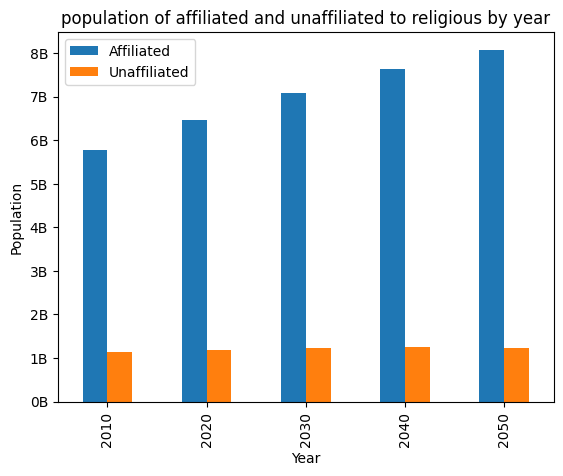

In [9]:
import matplotlib.ticker as mtick #import essential library

by_year = df_world.groupby("Year")[["Affiliated","Unaffiliated"]].sum() #group 2 categories by Year column
ax = by_year.plot(kind="bar") #create bar graph with plot method

plt.xlabel("Year") #set name of x axis
plt.ylabel("Population") #set name of y axis
plt.title("population of affiliated and unaffiliated to religious by year") #set name of graph

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{x / 1e9:.0f}B")) #transform our values on the y-axis in a convenient way to read
#define a custom formatter on the y-axis

plt.show()

# Make conclusion to this part #
On the graph above we see that number of Affiliated category is quite big compared to Unffiliated, and tendency of Affiliated is increasing every 10 years compared to the tendency of Unffiliated, which does not change.

In [10]:
df_world

Year  Region         Country  Affiliated  Unaffiliated  Christians  \
0    2010   World   All Countries  5764700000    1131150000  2168330000   
241  2020   World   All Countries  6463580000    1193750000  2382750000   
482  2030   World   All Countries  7089890000    1233020000  2578790000   
723  2040   World   All Countries  7631000000    1244190000  2756390000   
964  2050   World   All Countries  8076860000    1230340000  2918070000   

        Muslims      Hindus  Buddhists  Folk Religions  Other Religions  \
0    1599700000  1032210000  487760000       404690000         58150000   
241  1907110000  1161440000  506990000       429640000         60990000   
482  2209270000  1267290000  511300000       445490000         62490000   
723  2497830000  1342680000  503940000       451910000         62550000   
964  2761480000  1384360000  486270000       449140000         61450000   

         Jews  All Religions  
0    13860000     6895850000  
241  14660000     7657330000  
482  15260000     8322920000  
723  15700000     8875200000  
964  16090000     9307190000

## Trend comparison of each category by year ##

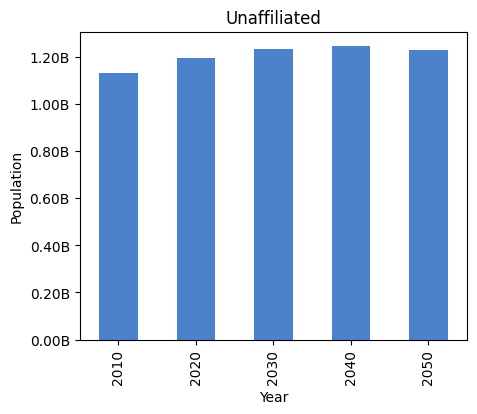

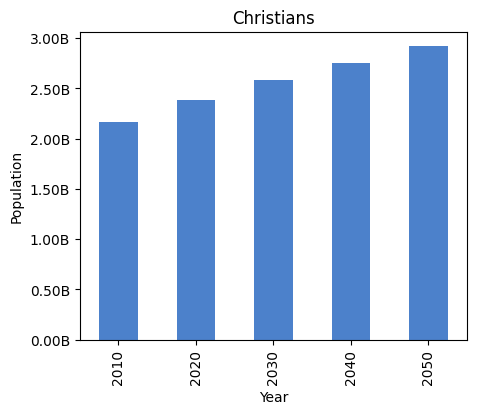

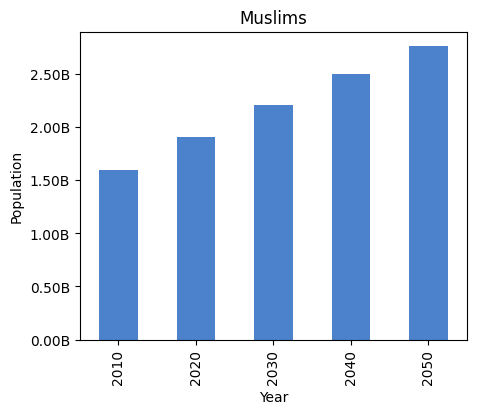

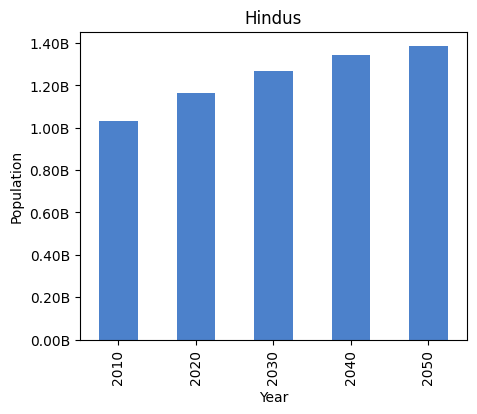

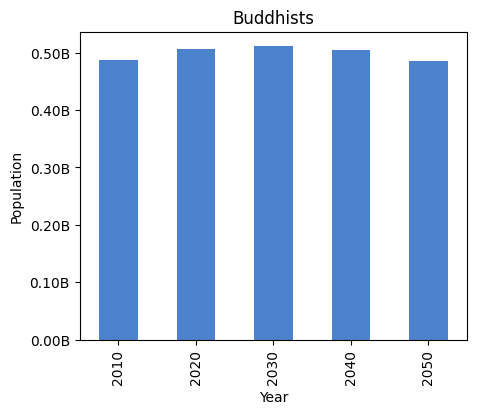

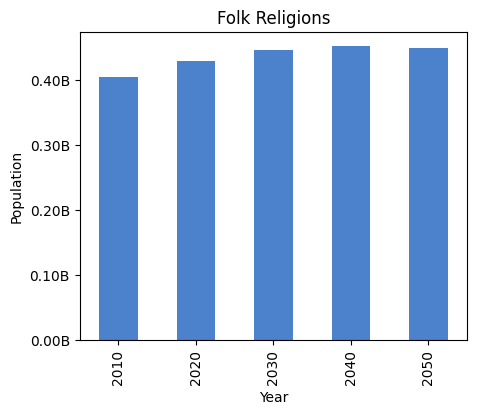

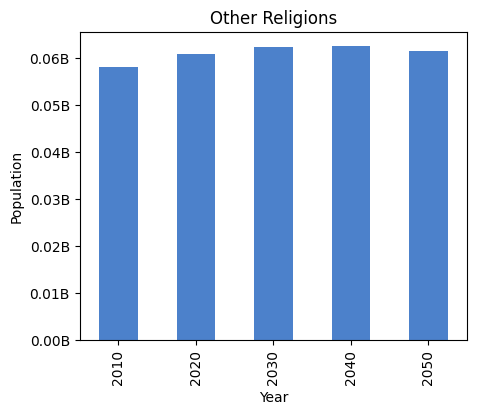

In [11]:
category = df_world.iloc[:, 4:11]
category_names = category.columns 

for category_name in category_names:
    by_year = df_world.groupby("Year")[category_name].sum()
    graph = by_year.plot(kind="bar", color="#4C81CB", figsize=(5,4))
    plt.xlabel("Year")
    plt.ylabel("Population")
    plt.title(category_name)            
    graph.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{x / 1e9:.2f}B"))

    plt.show() 

# Make conclusion to this part #
On the graph above we see:
* The tendency of the unffiliated category does not change much, from 2020 to 2030 we observe a small increase, from 2030 to 2040 we observe that numbers     don't change much, from 2040 to 2050 we observe a decrease.
  
* The tendency of the category of Christians increases significantly every 10 years, with 300 - 400 millions people every 10 years.
  
* The tendency of the category of Muslims increases significantly every 10 years, with 300 - 400 millions people every 10 years.
  
* The tendency of the category of Hindus increases consistency every 10 years,but to compare with Christians and Muslims does't very much, with 100 - 200 millions people every 10 years.
  
* The tendency of the Buddhist category doesn't increase significantly, but we also observe a slight decrease in 2040 and 2050.
  
* The tendency of the Folk Religions category has a small step increase by 2040 and a small decrease in 2050.
  
* The tendency of the Other Religions category has a small step increase by 2040 and a small decrease in 2050.

## Trend comparison of categories by year in pie diagram ##

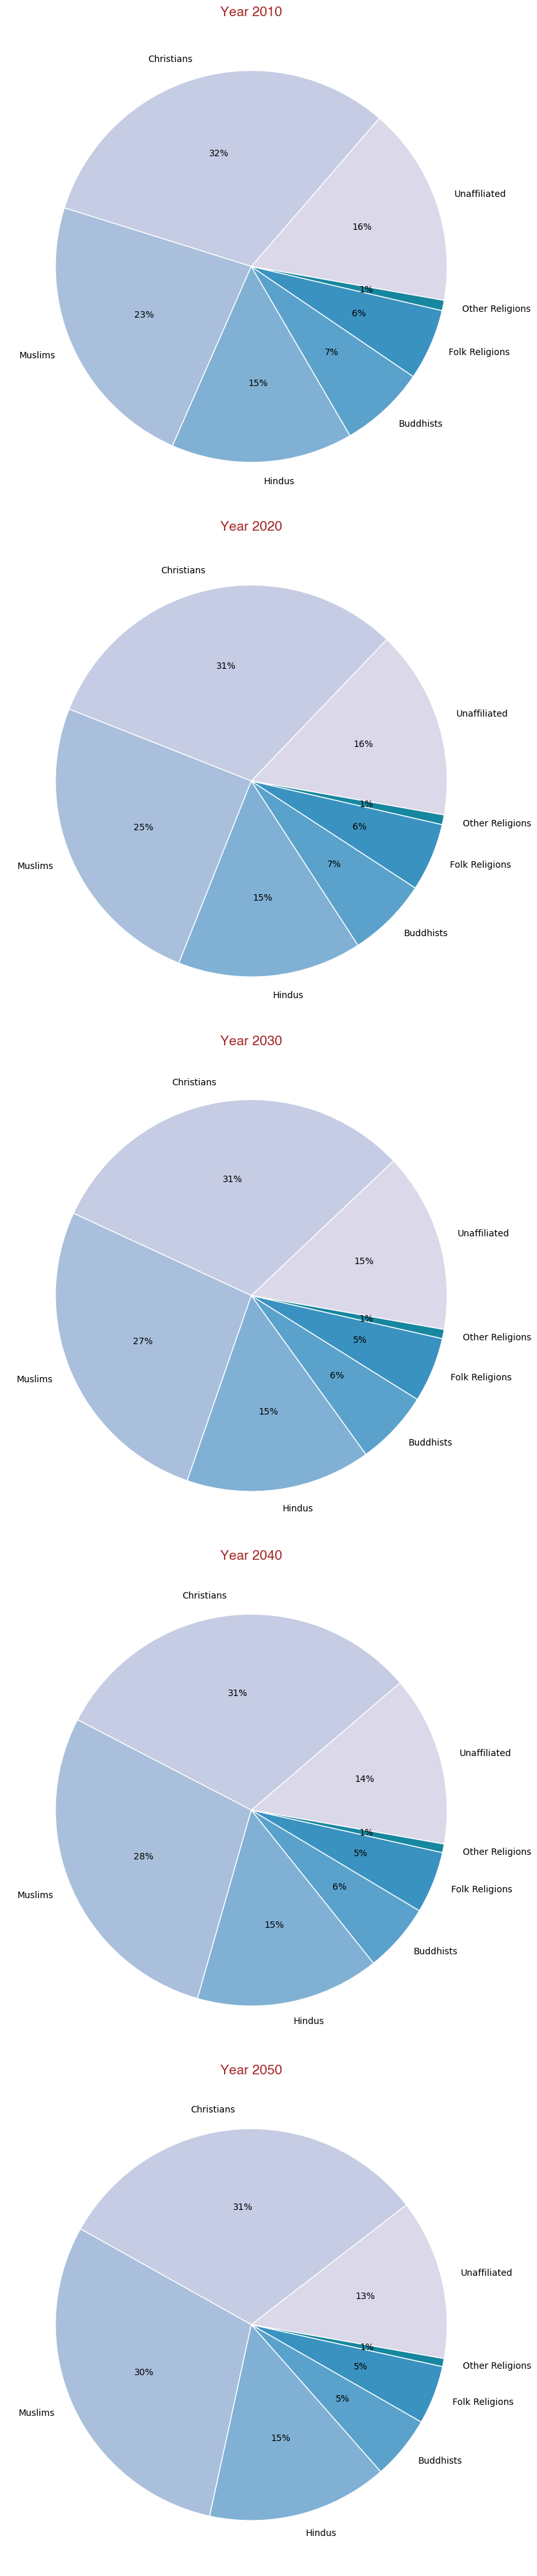

In [12]:
category = df_world.iloc[:, 4:11]
category_names = category.columns
num_rows = 5
num_cols = 1
num_subplots = num_rows * num_cols
fig, axs = plt.subplots(num_rows, num_cols , figsize=(45, 40))

axs = axs.flatten() #axs = axs.flatten() is used to transform a multi-dimensional NumPy array or list of Matplotlib subplots into a 1-dimensional array or list.
years_to_plot = list(df_world["Year"])

for i, year in enumerate(years_to_plot):
    data_for_year = df_world[df_world["Year"] == year]

    total_count = data_for_year[category_names].sum()

    colors = plt.get_cmap('PuBuGn')(np.linspace(0.2, 0.7, len(category_names)))
    axs[i].pie(total_count, labels=category_names, autopct='%1.0f%%', colors=colors,
                   wedgeprops={"linewidth": 1, "edgecolor": "white"}, startangle=350)

    axs[i].set_title(f"Year {year}", fontdict={'fontsize': 15, 'color': 'brown', 'fontfamily': 'Helvetica'})

plt.tight_layout() #improve the readability of plots 
plt.show()


# Make conclusion to this part #
On the graph above we see:
* 1 diagram 2010 - the most piece has Christians category 32% than Muslims 23%
  
* 2 diagram 2020 - the most piece has Christians category 31% than Muslims 25% - we can see that in 2020 the percentage of Christians is lower at 1% and the percentage of Muslims is higher at 2% - other categories didn't change.
  
* 3 diagram 2030 - the most piece has Christians category 31% than Muslims 27% - we can see that in 2030 the percentage of Christians doesn't change, but for Muslims categore became higher at 2% - also percentage of Unaffiliated category is lower at 1%(from 16% to 15%), percentage of Folk Religions become lower at 1%(from 6% to %5) and percentage of Buddhists became lower also at 1%(from 7% to 6%), others catogories don't change.
  
* 4 diagram 2040 - the most piece has Christians category 31% than Muslims 28% - we can see that in 2040 the percentage of Christians doesn't change, but for Muslims categore became higher at 1% - also percentage of Unaffiliated category is lower at 1%(from 15% to 14%), others catogories don't change.
  
* 5 diagram 2050 - the most piece has Christians category 31% than Muslims 30% - we can see that in 2050 the percentage of Christians doesn't change, but for Muslims categore became higher at 2% - also percentage of Unaffiliated category is lower at 1%(from 14% to 13%), the percentage of Buddhists became lower at 1%(from 6% to 5%)others catogories don't change.

## Comparison of 2 the most big categories - Christians and Muslims -  by year in Bar graph ##

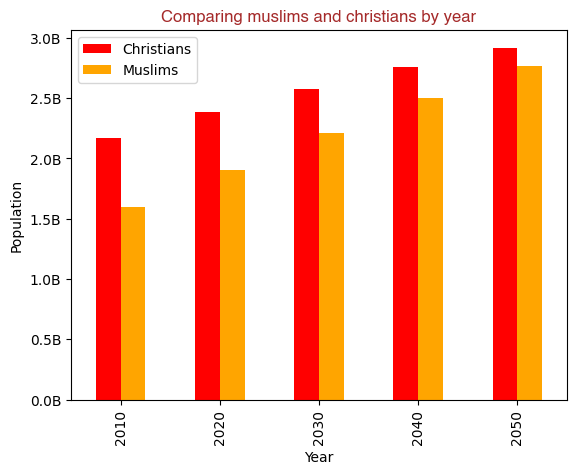

In [13]:
#comparing muslims and christians

by_year = df_world.groupby("Year")[["Christians","Muslims"]].sum()
ax = by_year.plot(kind="bar", color=["red", "orange"])

plt.xlabel("Year")
plt.ylabel("Population")
plt.title(f"Comparing muslims and christians by year", fontdict={'fontsize': 12, 'color': 'brown', 'fontfamily': 'Helvetica'})

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{x / 1e9:.1f}B"))

plt.show()

## Conclusion to this part ##
We can observe that the number of Christians and Muslims increases significantly every 10 years, and in 2050 the number of Christians will be slightly higher than that of Muslims.






## Import again our DataFrame ##





In [14]:
df

Year                    Region                Country  Christians  \
0     2010                     World          All Countries  2168330000   
1     2010             North America          All Countries   266630000   
2     2010   Latin America-Caribbean          All Countries   531280000   
3     2010                    Europe          All Countries   553280000   
4     2010  Middle East-North Africa          All Countries    12710000   
...    ...                       ...                    ...         ...   
1200  2050        Sub-Saharan Africa               Zimbabwe    16230000   
1201  2050        Sub-Saharan Africa            South Sudan    12750000   
1202  2050   Latin America-Caribbean                Curacao      170000   
1203  2050   Latin America-Caribbean           Sint Maarten       60000   
1204  2050   Latin America-Caribbean  Caribbean Netherlands       20000   

         Muslims  Unaffiliated      Hindus  Buddhists  Folk Religions  \
0     1599700000    1131150000  1032210000  487760000       404690000   
1        3480000      59040000     2250000    3860000         1020000   
2         840000      45390000      660000     410000        10040000   
3       43470000     139890000     1380000    1350000          870000   
4      317070000       2100000     1720000     500000         1060000   
...          ...           ...         ...        ...             ...   
1200      200000       1430000       10000      10000          930000   
1201     1300000        100000       10000      10000         6930000   
1202       10000         10000       10000      10000           10000   
1203       10000         10000       10000      10000           10000   
1204       10000         10000       10000      10000           10000   

      Other Religions      Jews  All Religions  
0            58150000  13860000     6895850000  
1             2200000   6040000      344530000  
2              990000    470000      590080000  
3              890000   1420000      742550000  
4              230000   5630000      341020000  
...               ...       ...            ...  
1200            50000     10000       18850000  
1201            10000     10000       21080000  
1202            10000     10000         180000  
1203            10000     10000          60000  
1204            10000     10000          20000  

[1205 rows x 12 columns]

## Remove rows that contain "All Countries" in column Country ##





In [15]:
df_country_delete = df[df["Country"].str.contains("All Countries")].index
df_country = df.drop(index=df_country_delete)
df_country

Year                    Region                Country  Christians  \
7     2010              Asia-Pacific            Afghanistan       30000   
8     2010                    Europe                Albania      580000   
9     2010  Middle East-North Africa                Algeria       60000   
10    2010              Asia-Pacific         American Samoa       50000   
11    2010                    Europe                Andorra       70000   
...    ...                       ...                    ...         ...   
1200  2050        Sub-Saharan Africa               Zimbabwe    16230000   
1201  2050        Sub-Saharan Africa            South Sudan    12750000   
1202  2050   Latin America-Caribbean                Curacao      170000   
1203  2050   Latin America-Caribbean           Sint Maarten       60000   
1204  2050   Latin America-Caribbean  Caribbean Netherlands       20000   

       Muslims  Unaffiliated  Hindus  Buddhists  Folk Religions  \
7     31330000         10000   10000      10000           10000   
8      2570000         50000   10000      10000           10000   
9     34730000        660000   10000      10000           10000   
10       10000         10000   10000      10000           10000   
11       10000         10000   10000      10000           10000   
...        ...           ...     ...        ...             ...   
1200    200000       1430000   10000      10000          930000   
1201   1300000        100000   10000      10000         6930000   
1202     10000         10000   10000      10000           10000   
1203     10000         10000   10000      10000           10000   
1204     10000         10000   10000      10000           10000   

      Other Religions   Jews  All Religions  
7               20000  10000       31410000  
8               10000  10000        3200000  
9               10000  10000       35470000  
10              10000  10000          60000  
11              10000  10000          80000  
...               ...    ...            ...  
1200            50000  10000       18850000  
1201            10000  10000       21080000  
1202            10000  10000         180000  
1203            10000  10000          60000  
1204            10000  10000          20000  

[1170 rows x 12 columns]

## Make all columns str type ##


In [16]:
df_country.columns = list(map(str, df_country.columns))
df_country

Year                    Region                Country  Christians  \
7     2010              Asia-Pacific            Afghanistan       30000   
8     2010                    Europe                Albania      580000   
9     2010  Middle East-North Africa                Algeria       60000   
10    2010              Asia-Pacific         American Samoa       50000   
11    2010                    Europe                Andorra       70000   
...    ...                       ...                    ...         ...   
1200  2050        Sub-Saharan Africa               Zimbabwe    16230000   
1201  2050        Sub-Saharan Africa            South Sudan    12750000   
1202  2050   Latin America-Caribbean                Curacao      170000   
1203  2050   Latin America-Caribbean           Sint Maarten       60000   
1204  2050   Latin America-Caribbean  Caribbean Netherlands       20000   

       Muslims  Unaffiliated  Hindus  Buddhists  Folk Religions  \
7     31330000         10000   10000      10000           10000   
8      2570000         50000   10000      10000           10000   
9     34730000        660000   10000      10000           10000   
10       10000         10000   10000      10000           10000   
11       10000         10000   10000      10000           10000   
...        ...           ...     ...        ...             ...   
1200    200000       1430000   10000      10000          930000   
1201   1300000        100000   10000      10000         6930000   
1202     10000         10000   10000      10000           10000   
1203     10000         10000   10000      10000           10000   
1204     10000         10000   10000      10000           10000   

      Other Religions   Jews  All Religions  
7               20000  10000       31410000  
8               10000  10000        3200000  
9               10000  10000       35470000  
10              10000  10000          60000  
11              10000  10000          80000  
...               ...    ...            ...  
1200            50000  10000       18850000  
1201            10000  10000       21080000  
1202            10000  10000         180000  
1203            10000  10000          60000  
1204            10000  10000          20000  

[1170 rows x 12 columns]

In [17]:
# world_map = folium.Map(location=[0, 0], zoom_start=2)


# min_value = df_country['All Religions'].min()
# max_value = df_country['All Religions'].max()

# num_bins = 10

# bin_width = (max_value - min_value) / num_bins

# choropleth = folium.Choropleth(
#     geo_data='world_countries.json',  
#     data=df_country,
#     columns=['Country', 'All Religions'],
#     key_on='feature.properties.name',
#     fill_color='YlGnBu',
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     legend_name='Distribution of Religious People',
#     nan_fill_color='white',
#     bins=[min_value + bin_width * i for i in range(num_bins + 1)], 
#     reset=True
# ).add_to(world_map)

# choropleth.color_scale.width = 500
# world_map

In [18]:
# df_2020 = df_country[df_country['Year'] == 2030]
# world_map = folium.Map(location=[0, 0], zoom_start=2)

# folium.Choropleth(
#     geo_data='world_countries.json',  
#     data=df_2020,
#     columns=['Country', 'All Religions'],
#     key_on='feature.properties.name',
#     fill_color='YlGnBu',
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     legend_name='Distribution of Religious People in 2020'
# ).add_to(world_map)
# world_map

In [19]:

move_column = df_country.pop('Unaffiliated')
df_country.insert(3, 'Unaffiliated', move_column) #replace Unaffiliated column
# df_country

move_column = df_country.pop('All Religions')
df_country.insert(4, 'All Religions', move_column) #replace All Religions column
# df_country

df_country["Affiliated"] = df_country.iloc[:, 5:].sum(axis=1) #add column named Affiliated
df_country


Year                    Region                Country  Unaffiliated  \
7     2010              Asia-Pacific            Afghanistan         10000   
8     2010                    Europe                Albania         50000   
9     2010  Middle East-North Africa                Algeria        660000   
10    2010              Asia-Pacific         American Samoa         10000   
11    2010                    Europe                Andorra         10000   
...    ...                       ...                    ...           ...   
1200  2050        Sub-Saharan Africa               Zimbabwe       1430000   
1201  2050        Sub-Saharan Africa            South Sudan        100000   
1202  2050   Latin America-Caribbean                Curacao         10000   
1203  2050   Latin America-Caribbean           Sint Maarten         10000   
1204  2050   Latin America-Caribbean  Caribbean Netherlands         10000   

      All Religions  Christians   Muslims  Hindus  Buddhists  Folk Religions  \
7          31410000       30000  31330000   10000      10000           10000   
8           3200000      580000   2570000   10000      10000           10000   
9          35470000       60000  34730000   10000      10000           10000   
10            60000       50000     10000   10000      10000           10000   
11            80000       70000     10000   10000      10000           10000   
...             ...         ...       ...     ...        ...             ...   
1200       18850000    16230000    200000   10000      10000          930000   
1201       21080000    12750000   1300000   10000      10000         6930000   
1202         180000      170000     10000   10000      10000           10000   
1203          60000       60000     10000   10000      10000           10000   
1204          20000       20000     10000   10000      10000           10000   

      Other Religions   Jews  Affiliated  
7               20000  10000    31420000  
8               10000  10000     3200000  
9               10000  10000    34840000  
10              10000  10000      110000  
11              10000  10000      130000  
...               ...    ...         ...  
1200            50000  10000    17440000  
1201            10000  10000    21020000  
1202            10000  10000      230000  
1203            10000  10000      120000  
1204            10000  10000       80000  

[1170 rows x 13 columns]

In [20]:
# df_country = df_country.drop(columns="All Religions") #renove column All Religions
# df_country
move_column = df_country.pop('Affiliated')
df_country.insert(4, 'Affiliated', move_column) #replace Affiliated column
df_country

Year                    Region                Country  Unaffiliated  \
7     2010              Asia-Pacific            Afghanistan         10000   
8     2010                    Europe                Albania         50000   
9     2010  Middle East-North Africa                Algeria        660000   
10    2010              Asia-Pacific         American Samoa         10000   
11    2010                    Europe                Andorra         10000   
...    ...                       ...                    ...           ...   
1200  2050        Sub-Saharan Africa               Zimbabwe       1430000   
1201  2050        Sub-Saharan Africa            South Sudan        100000   
1202  2050   Latin America-Caribbean                Curacao         10000   
1203  2050   Latin America-Caribbean           Sint Maarten         10000   
1204  2050   Latin America-Caribbean  Caribbean Netherlands         10000   

      Affiliated  All Religions  Christians   Muslims  Hindus  Buddhists  \
7       31420000       31410000       30000  31330000   10000      10000   
8        3200000        3200000      580000   2570000   10000      10000   
9       34840000       35470000       60000  34730000   10000      10000   
10        110000          60000       50000     10000   10000      10000   
11        130000          80000       70000     10000   10000      10000   
...          ...            ...         ...       ...     ...        ...   
1200    17440000       18850000    16230000    200000   10000      10000   
1201    21020000       21080000    12750000   1300000   10000      10000   
1202      230000         180000      170000     10000   10000      10000   
1203      120000          60000       60000     10000   10000      10000   
1204       80000          20000       20000     10000   10000      10000   

      Folk Religions  Other Religions   Jews  
7              10000            20000  10000  
8              10000            10000  10000  
9              10000            10000  10000  
10             10000            10000  10000  
11             10000            10000  10000  
...              ...              ...    ...  
1200          930000            50000  10000  
1201         6930000            10000  10000  
1202           10000            10000  10000  
1203           10000            10000  10000  
1204           10000            10000  10000  

[1170 rows x 13 columns]

## Put 2 categories - Affiliated and Unaffiliated - to visualize on maps ##

In [21]:
categories = list(df_country.iloc[:, 3:5])
categories

['Unaffiliated', 'Affiliated']

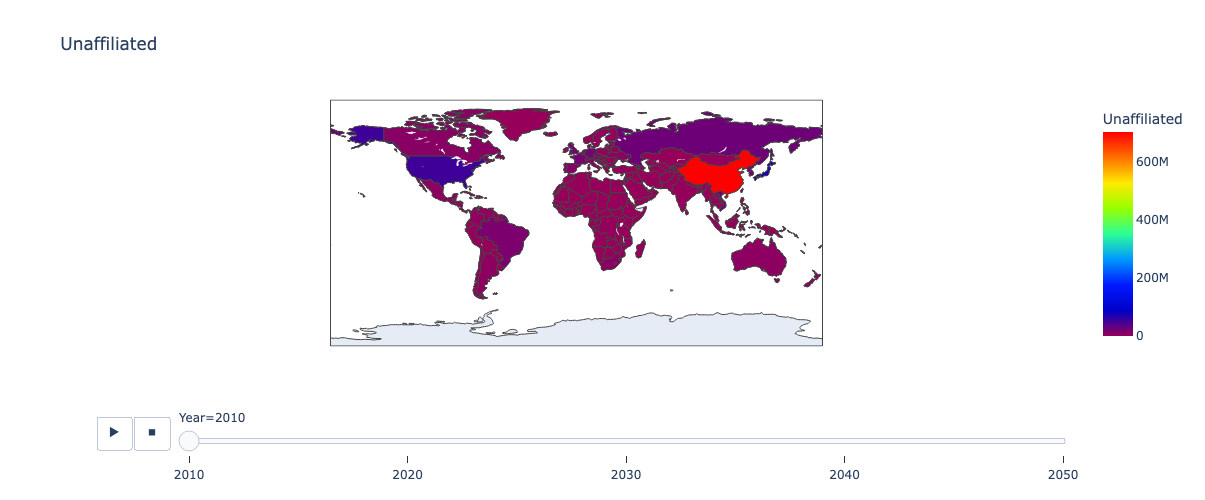

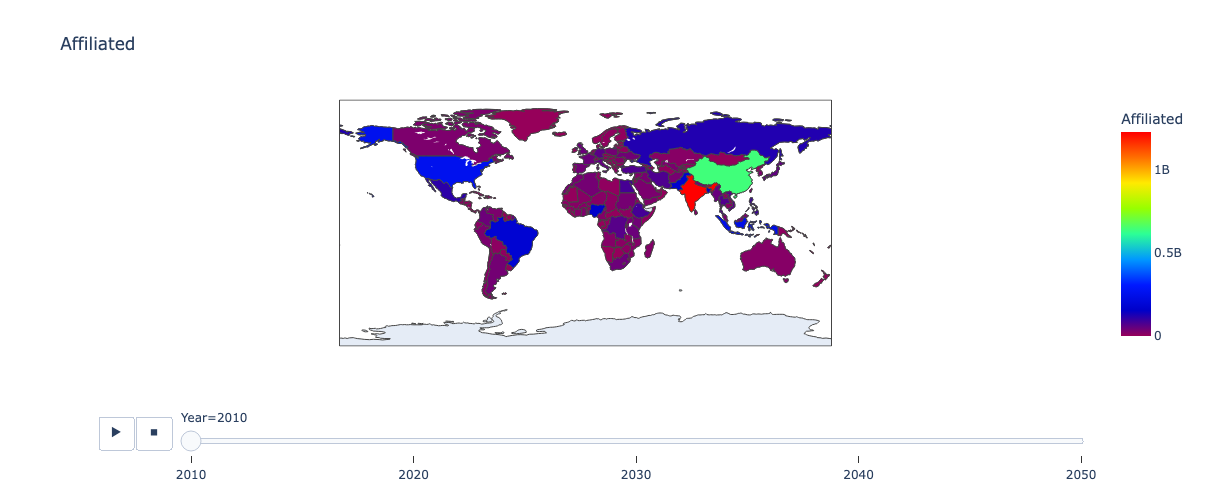

In [22]:
for i in categories:
    fig = px.choropleth(df_country,
                            locations='Country', locationmode='country names',
                            color = i,hover_name="Country",
                            animation_frame="Year",
                            title = i,
                            color_continuous_scale='Rainbow')
    

    fig.update_layout(width=1000, height=500)
    fig.show()

# Conclusion to this part #
* Affiliated map - we can see that countries such as China, USA, Japan have the highest rates around the world - and this picture saving upon 2050 year.
  
* Unaffiliated map - we can see that countries such as India, Indonesia, USA, Brazil, China, Nigeria, Russia, Mexico, Pakistan have the highest rates around the world - and this picture saving upon 2050 year - but the count among Affiliated population,except India, lower each 10 years.

## Put all categories, except Affiliated and Unaffiliated, to visualize on maps ##

In [23]:
categories_1 = list(df_country.iloc[:, 6:])
categories_1


['Christians',
 'Muslims',
 'Hindus',
 'Buddhists',
 'Folk Religions',
 'Other Religions',
 'Jews']

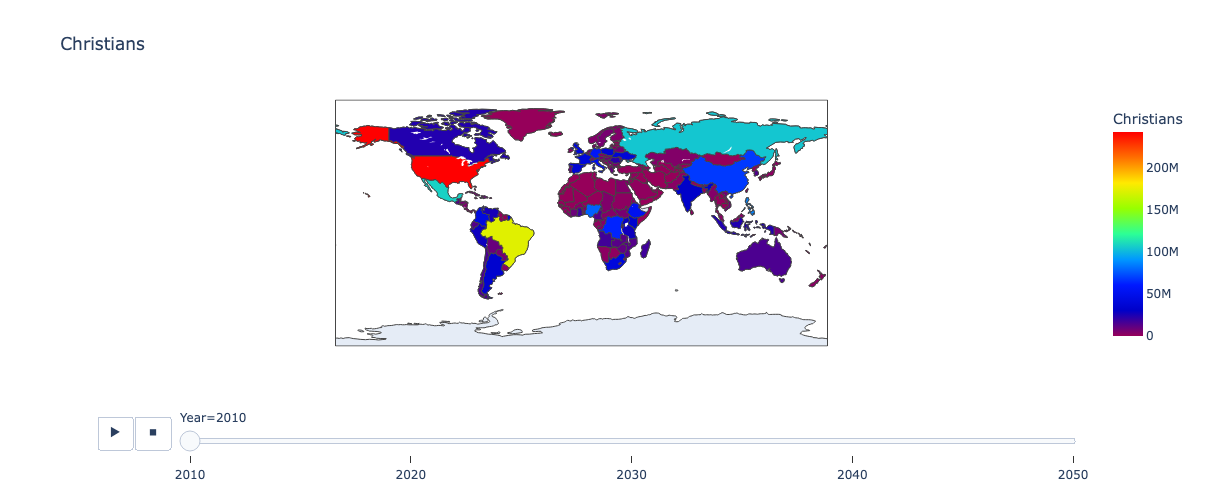

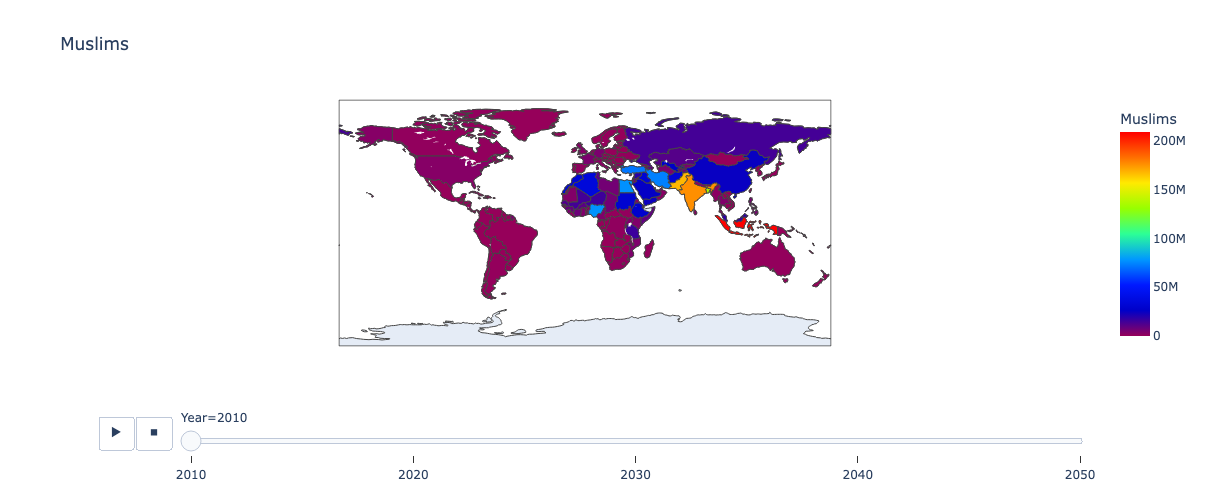

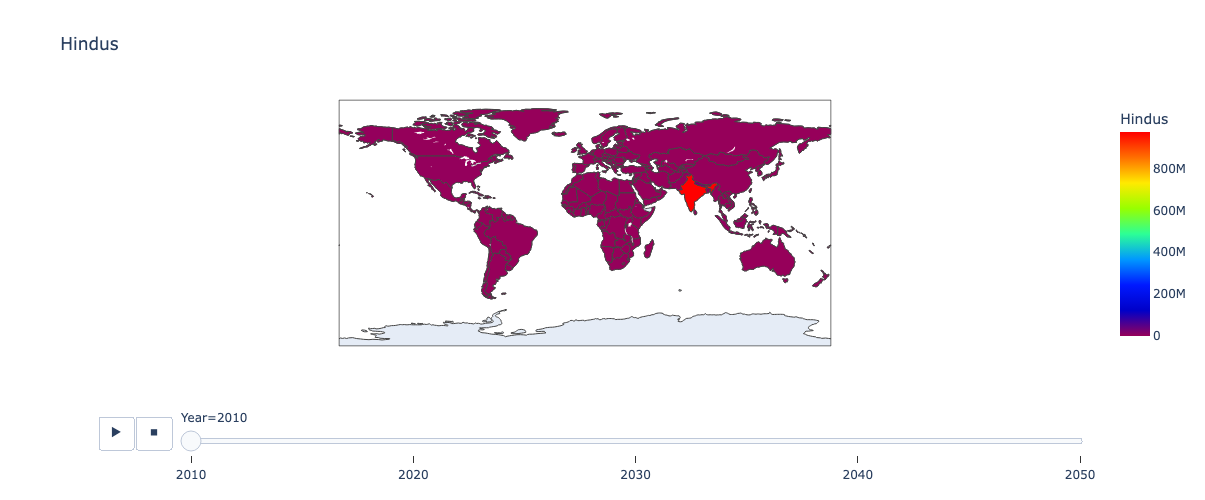

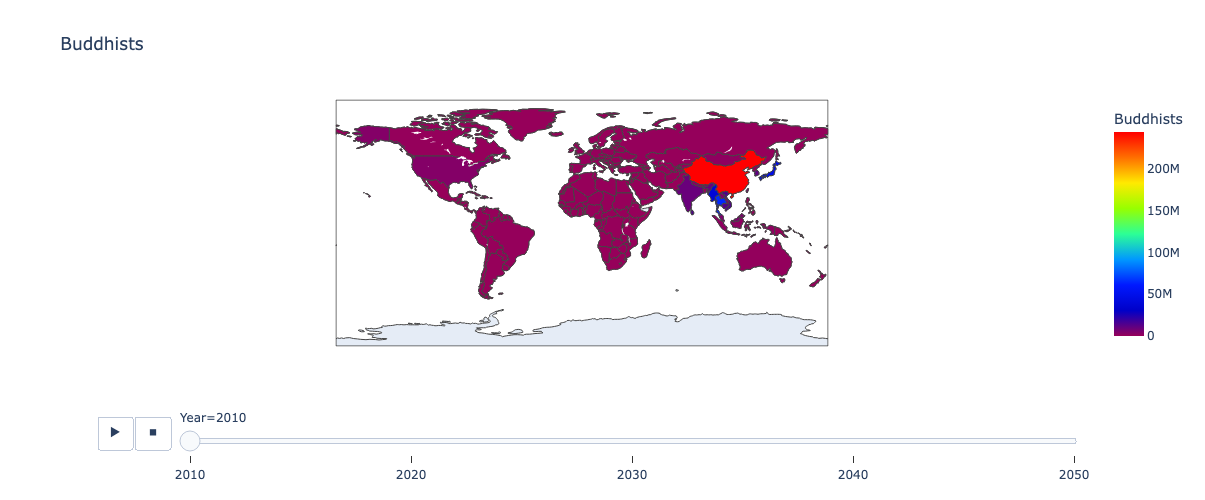

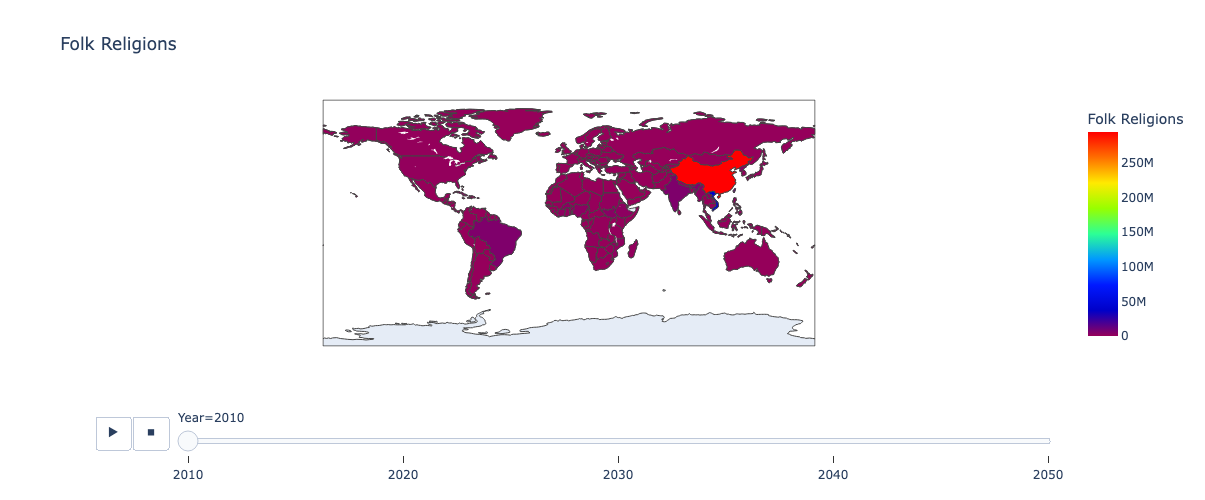

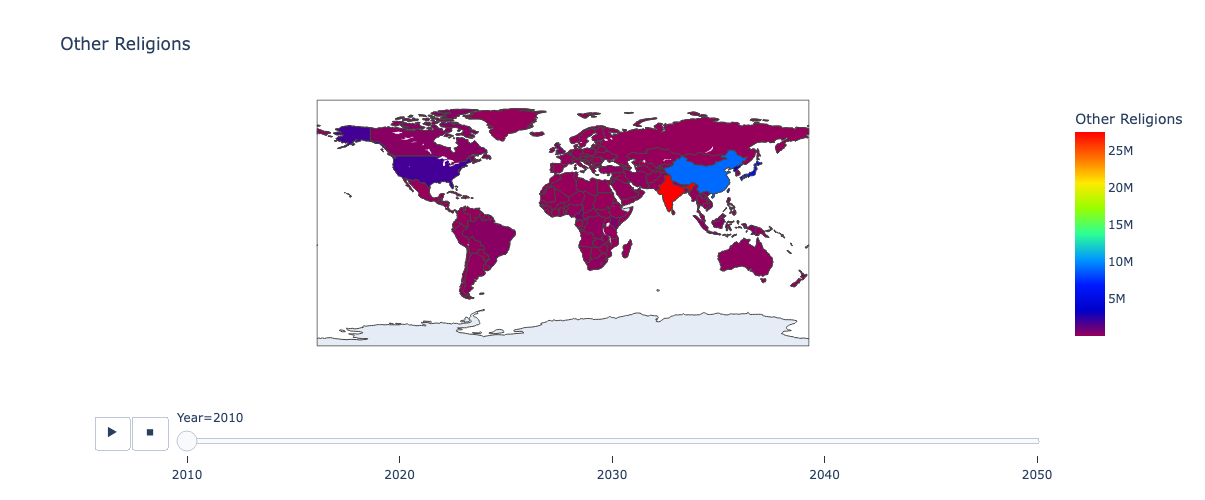

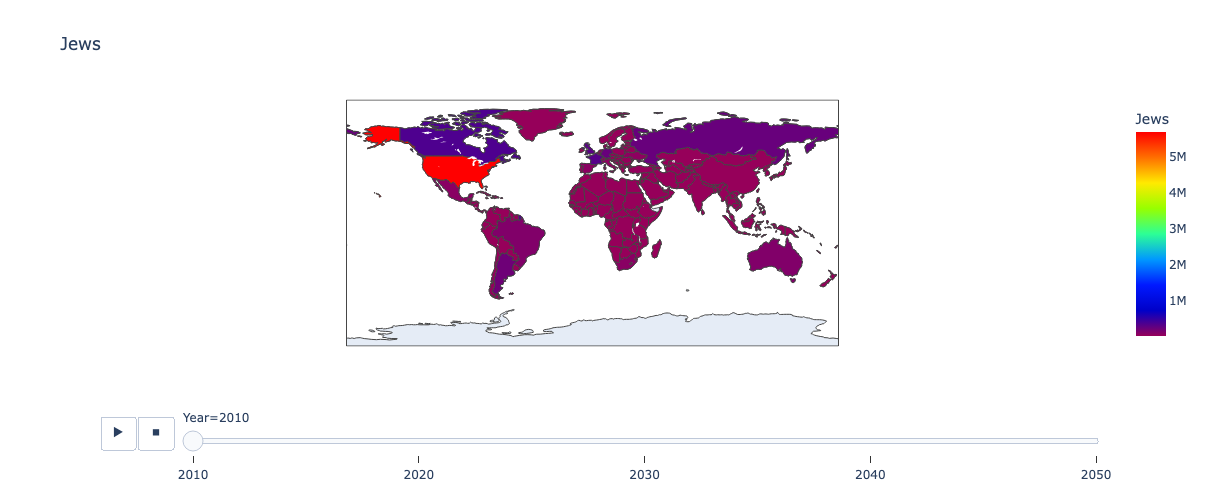

In [24]:
for i in categories_1:
    fig = px.choropleth(df_country,
                            locations='Country', locationmode='country names',
                            color = i,hover_name="Country",
                            animation_frame="Year",
                            title = f'{i}',
                            color_continuous_scale='Rainbow')
    

    fig.update_layout(width=1000, height=500)
    fig.show()

# Conclusion to this part #
* Christians category map - Most Christians are concentrated in the United States, Brazil, Mexico and Russia. The situation has changed significantly in Russia over the past 10 years, with the number of Christians decreasing, while the number of Christians has increased in some African countries such as Congo and Nigeria, and in the Philippines.
  
* Muslims category map - Most Muslims are concentrated around Asia, Indonesia, and northern Africa, which is not the case with other regions. In 2010, most Muslims were concentrated in Indonesia, and in 2050, India, Pakistan, Bangladesh, and Nigeria will join Indonesia.
  
* Hindus category map - Hindus are most concentrated in India , a situation that has not changed since 2010.

* Buddhists category map - Buddhists are most concentrated in China, Japan, and Thailand. The situation will not change over the next 10 years until 2050.
  
* Folk Religions category map - Folk religions are most prevalent in China and Vietnam.
  
* Other Religions category map -The category of Other religions is most common in China, the USA, Japan, North Korea and India. The situation will not change over the next 10 years until 2050.

* Jews category map -Jews are most concentrated in the United States and Israel.By 2050, these countries will be joined by Canada.

## Word Clouds ##

In [25]:
import matplotlib as mpl #import necessary library
mpl.style.use('ggplot') 

In [26]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [27]:
with open('Religios.txt', 'r') as f:
    religios_text = f.read() #read txt file

In [28]:
stopwords = set(STOPWORDS)

In [29]:
# instantiate a word cloud object
religios_cw = WordCloud(
    background_color='white',
    max_words=7000,
    stopwords=stopwords
)

# generate the word cloud
religios_cw.generate(religios_text)

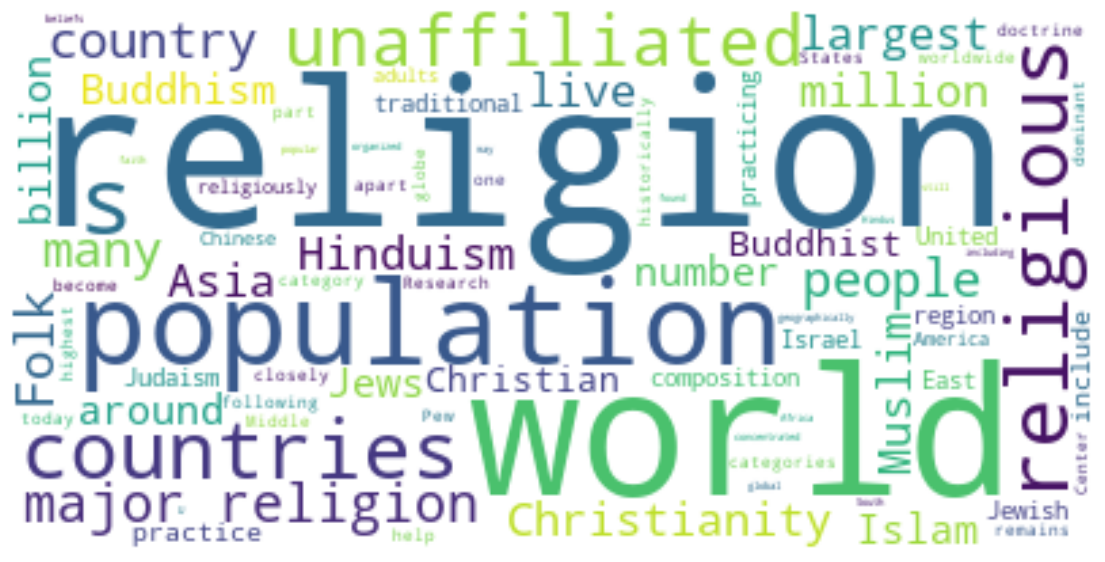

In [30]:
fig = plt.figure()
fig.set_figwidth(14) 
fig.set_figheight(18)

plt.imshow(religios_cw, interpolation='bilinear')
plt.axis('off')
plt.show()

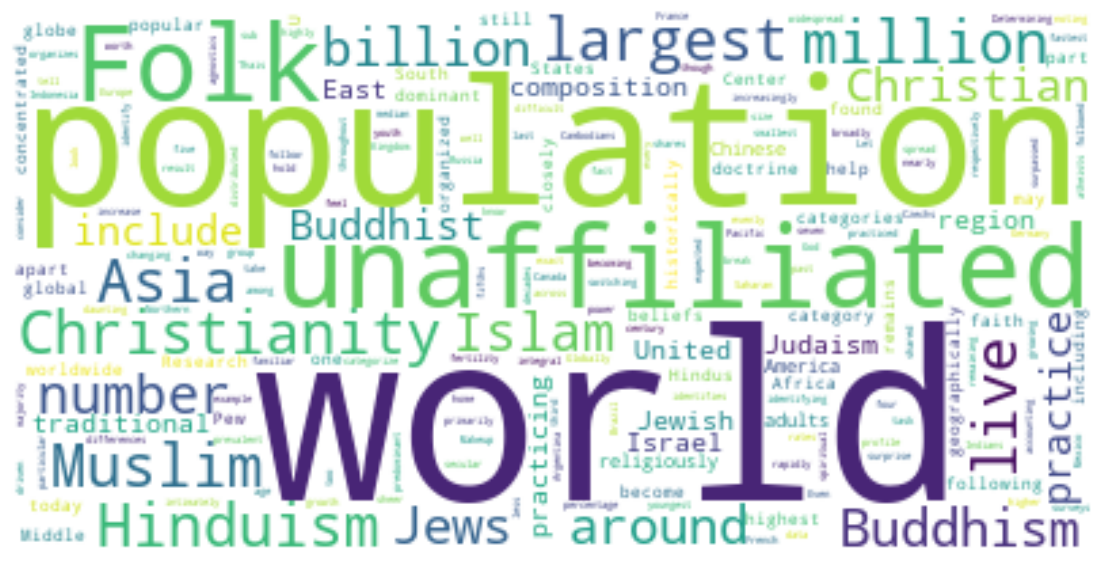

In [31]:
stopwords.add('countries')
stopwords.add('religious')
stopwords.add('s')
stopwords.add('religion')
stopwords.add('religions')
stopwords.add('major')
stopwords.add('people')
stopwords.add('many')
stopwords.add('country')
# re-generate the word cloud
religios_cw.generate(religios_text)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(religios_cw, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
from PIL import Image
 
# save mask to alice_mask
religion_mask = np.array(Image.open('heart-icon.jpeg'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


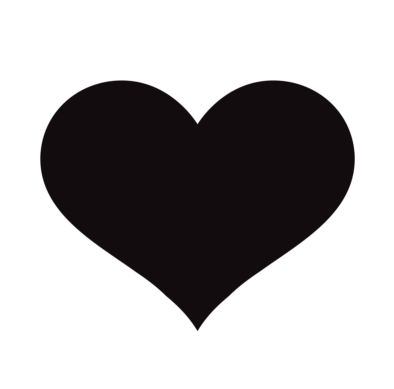

In [33]:
plt.imshow(religion_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

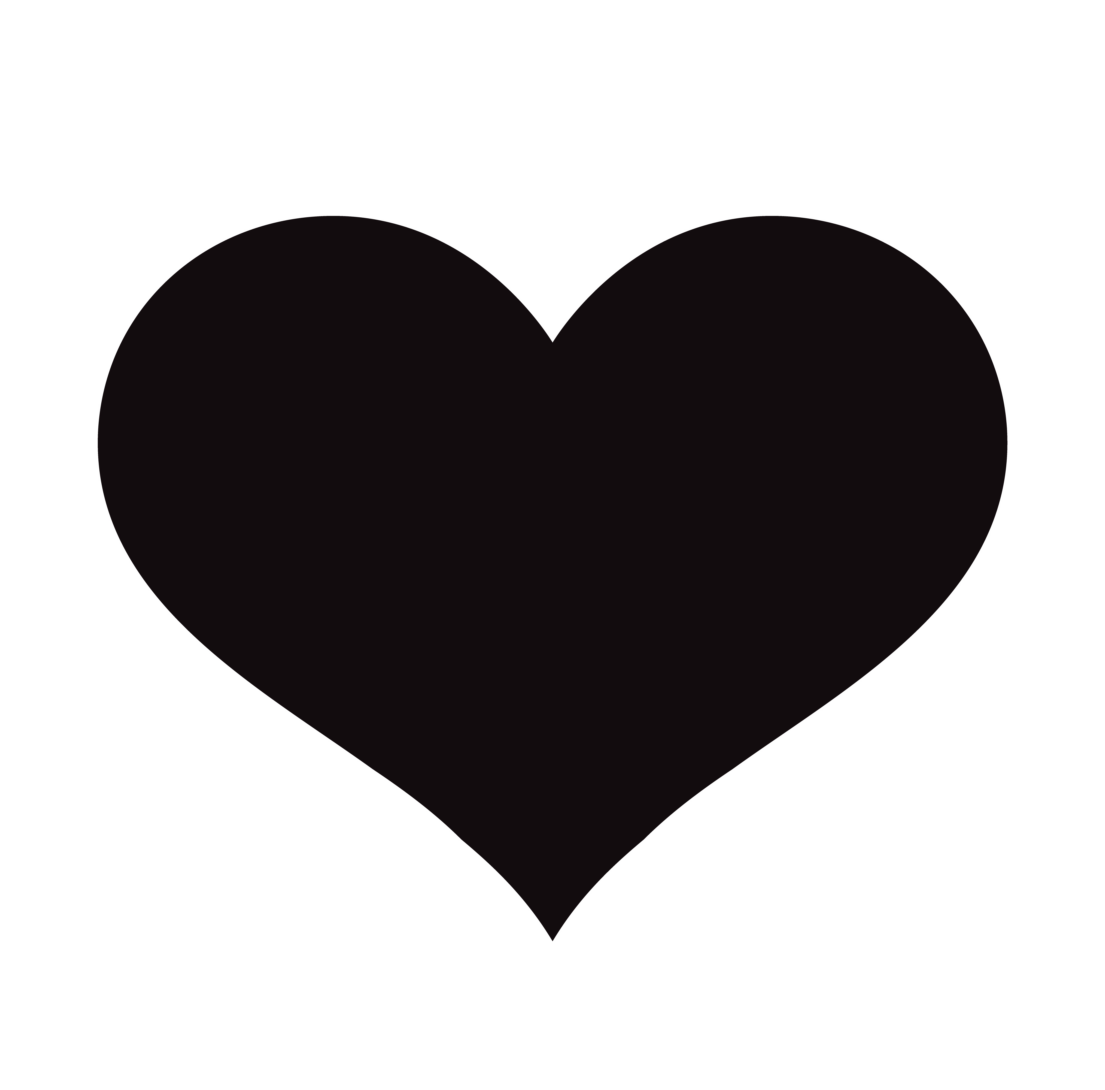

In [34]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(religion_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

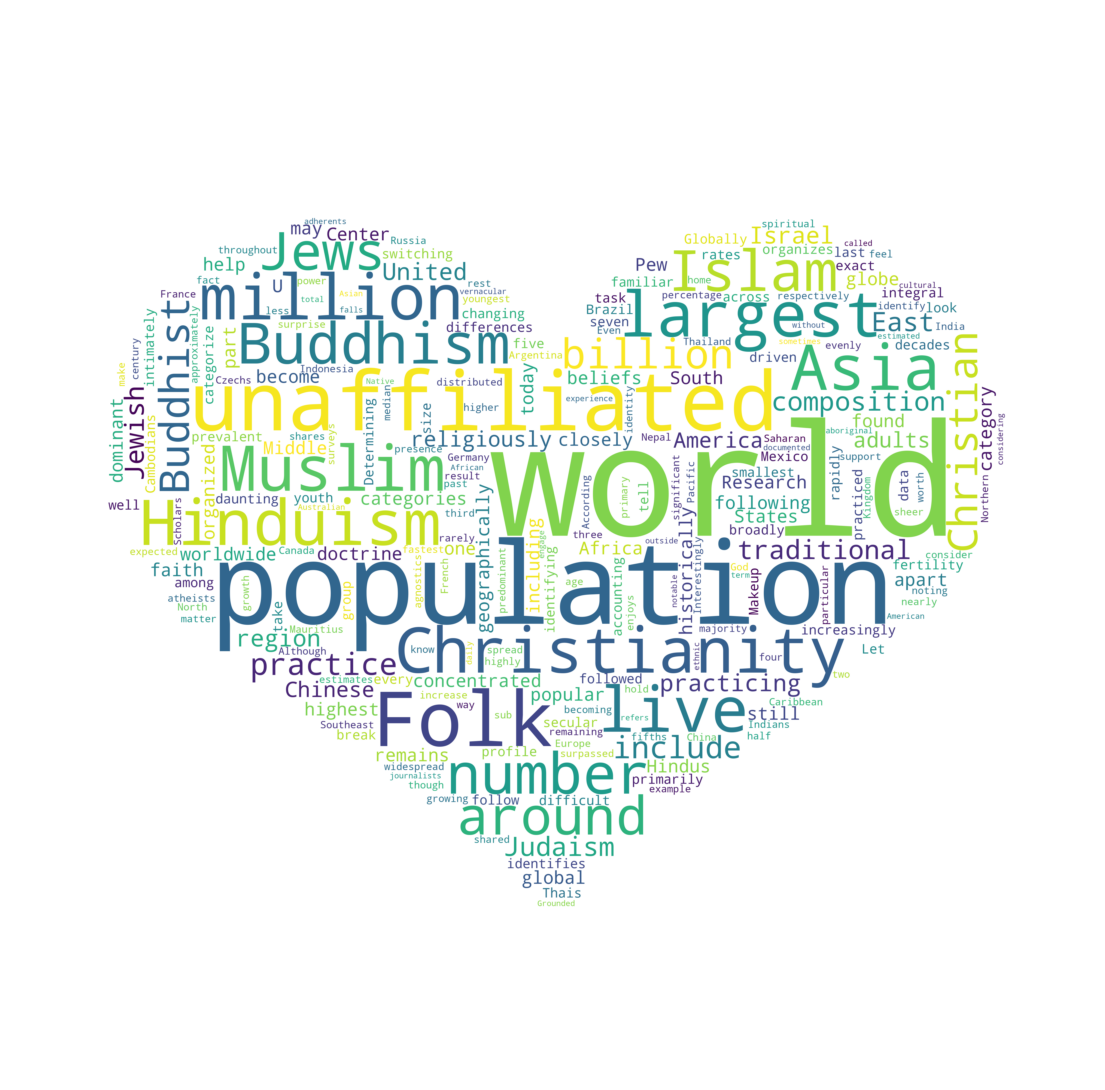

In [35]:
religios_cw = WordCloud(background_color='white', max_words=2000, mask=religion_mask, stopwords=stopwords)

religios_cw.generate(religios_text)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(religios_cw, interpolation='bilinear')
plt.axis('off')
plt.show()